We will be analysing whether the telescopic image is an uninfected image
or parasitized image of malaria

We will perform the following steps:

1. Loading the data
2. Splitting the data AND VISUALIZING IT
3. Preprocessing the data
4. Creating the model
5. Compiling the model
6. Fitting the model
7. Testing the model on new, unseen data
8. Saving our model
9. Visualizing our loss and accuracy
10.TESTING ON IMAGES FROM THE INTERNET
11. If needed , some model improvement steps or just for learning, we will study


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, InputLayer, Flatten, Conv2D, MaxPool2D, BatchNormalization

1. LOADING THE DATA

split = train is specified because split parameter is used to define which subset you want to load, it could be train, test, validation but in the case of malaria dataset, the dataset is named as 'train', so we have to later on split the dataset manually.

In [ ]:
dataset, dataset_info = tfds.load('Malaria', shuffle_files= True, with_info = True, as_supervised = True, split = ['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

2. SPLITTING THE DATASET

In [ ]:
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

dataset_size = len(dataset)

In [ ]:
def split_data(dataset, train_ratio, val_ratio, test_ratio):

  dataset_size = len(dataset)

  train_dataset = dataset.take(int(dataset_size * train_ratio))
  # print(f'TRAIN_DATASET = {list(train_dataset.as_numpy_iterator())}')

  val_dataset_ = dataset.skip(int(dataset_size * train_ratio))
  val_dataset = val_dataset_.take(int(dataset_size * val_ratio))

  test_dataset = val_dataset_.skip(int(dataset_size * val_ratio))

  return train_dataset, val_dataset, test_dataset




APPLYING THE SPLIT FUNCTION THAT WE MADE TO OUR DATASET

In [ ]:
train_dataset, val_dataset, test_dataset = split_data(dataset[0],train_ratio = 0.7, val_ratio = 0.1, test_ratio = 0.2)
# dataset[0] is what we took because dataset is a list and the first element of dataset is the data rest are its properties

PRINTING THE SPLIT VALUES

In [ ]:
print(list(train_dataset.take(2).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0), (array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
      

In [ ]:
print(list(val_dataset.take(2).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0), (array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
      

In [ ]:
print(list(test_dataset.take(2).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0), (array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
      

2.2 VISUALIZING THE DATASET

ENUMERATE COUNTERS i WHICH STARTS AT 0 AND INCREMENTS WITH 1, SO IT DOES INDEXING FOR EACH ITEM THAT WE ITERATEE OVER

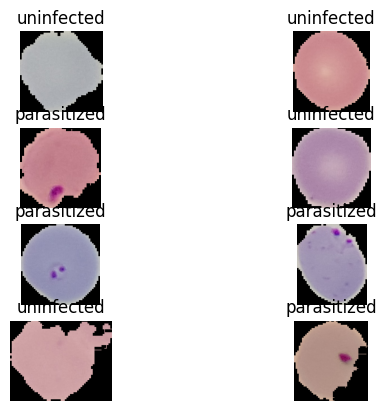

In [ ]:
for i , (image,label) in enumerate(train_dataset.take(8)):
  ax = plt.subplot(4,2, i + 1)   # I+1 IS DONE TO CONVERT THE 0 INDEXING TO 1 INDEXING , BECAUSE THATS WHAT PLT REQUIRES
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')


3. PREPROCESSING THE DATASET

FOR PREPROCESSING , WE MUST ALWAYS RESIZE THE IMAGES WHICH WILL MAKE SURE THAT
ALL THE IMAGES SHARE THE SAME CONSISTENCY AND WE ALSO RESCALE THE IMAGES BY DIVIDING THROUGH 255.0

STANDARDIATION INCLUDES SUBRTRACTING EACH VALUE FROM MEAN AND DIVIDING BY STANDARD DEVIATION.

NORMALIZATION MEANS RESCALING THE VALUES
WE NORMALIZE IF THE VALUES ARE DISTRIBUTED A LOT
WE STANDARDIZE IF THE VALUES ARE CENTERED AROUND THE MEAN


In [ ]:
IMG_SIZE = 224
def resize_rescale(image,label):
  return tf.image.resize(image, size= (IMG_SIZE,IMG_SIZE))/255.0, label

WE WILL APPLY THE RESIZE_RESCALE FUNCTION TO OUR DATASETS THROUGH MAPPING FUNCTION

In [ ]:
train_dataset = train_dataset.map(resize_rescale)

In [ ]:
val_dataset = val_dataset.map(resize_rescale)

In [ ]:
test_dataset = test_dataset.map(resize_rescale)

AS A PREPROCESSING STEP, SHUFFLING IS REALLY IMPORTANT TO PREVENT OVERFITTING

SHUFFLING WILL HELP THE MODEL TO NOT LEARN SEQUENCES AND STRAIGHT PATTERNS

PREFETCH FUNCTION IMPROVES THE PERFORMANCE OF THE MODEL

In [ ]:
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration= True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_dataset= val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration= True,).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
test_dataset = test_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True,).batch(32).prefetch(tf.data.AUTOTUNE)

NOW WE WILL MAKE SURE THAT ALL THE SPLIT DATASETS HAVE THE SAME NUMBER OF DIMENSION, THIS IS A COMMON PROBLEM AND IS CLEARED BY MAKING SURE THAT WE APPLY OUR PREPROCESSING STEPS TO ALL OUR SPLIT DATASETS

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

**CHECKING THE  LABELS, 0 - PARASITIZED AND 1 - UNINFECTED**

In [ ]:
dataset_info.features['label'].int2str(0)

'parasitized'

In [ ]:
dataset_info.features['label'].int2str(1)

'uninfected'

4. CREATING THE MODEL

In [ ]:
model = tf.keras.Sequential([
    InputLayer(input_shape = (IMG_SIZE, IMG_SIZE, 3)),

    Conv2D(filters = 6, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Flatten(),

    Dense(100, activation = 'relu'),
    BatchNormalization(),
    Dense(10, activation = 'relu'),
    BatchNormalization(),
    Dense(1, activation = 'sigmoid'),


])


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 6)         │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 6)         │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 16)        │             880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 46656)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │       4,665,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

5. COMPILING THE MODEL

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

6. FITTING THE MODEL

In [ ]:
history = model.fit(train_dataset, validation_data= val_dataset, epochs = 10,verbose = 1)

Epoch 1/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 63s 86ms/step - accuracy: 0.7072 - loss: 0.5752 - val_accuracy: 0.6040 - val_loss: 1.5440
Epoch 2/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 49s 81ms/step - accuracy: 0.8976 - loss: 0.2598 - val_accuracy: 0.8701 - val_loss: 0.3072
Epoch 3/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 71s 64ms/step - accuracy: 0.9211 - loss: 0.2108 - val_accuracy: 0.8966 - val_loss: 0.3518
Epoch 4/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 38s 64ms/step - accuracy: 0.9260 - loss: 0.1978 - val_accuracy: 0.9245 - val_loss: 0.2458
Epoch 5/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.9348 - loss: 0.1735 - val_accuracy: 0.9078 - val_loss: 0.3259
Epoch 6/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 70s 64ms/step - accuracy: 0.9422 - loss: 0.1582 - val_accuracy: 0.9285 - val_loss: 0.2111
Epoch 7/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.9471 - loss: 0.1448 - val_accuracy: 0.9292 - val_loss: 0.2174
Epoch 8/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9523 - loss: 0.1330 - 

7. Testing the model on new, unseen data

In [ ]:
model.evaluate(test_dataset)

173/173 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.9419 - loss: 0.1930


[0.2129325568675995, 0.9356067180633545]

The model performed really well on the new unseen data, lets go guys

8. SAVING OUR MODEL

In [ ]:
# SAVING IN H5 FORMAT
model.save('malaria_model.h5')

In [ ]:
# SAVING THE MODEL IN TFLITE FORMAT FOR BETTER EFFICIENCY
import tensorflow as tf

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Optional: Set optimizations for reducing model size and improving performance
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
tflite_model = converter.convert()

# Save the converted model to a .tflite file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpkohg0tt3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_52')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  138533893839984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138533893834000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138533893839104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138533893844384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138533893836640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138533893843152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138533893846144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138533893848432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138533893843680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138533893834528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13853389384

9. VISUALIZING OUR LOSS AND ACCURACY

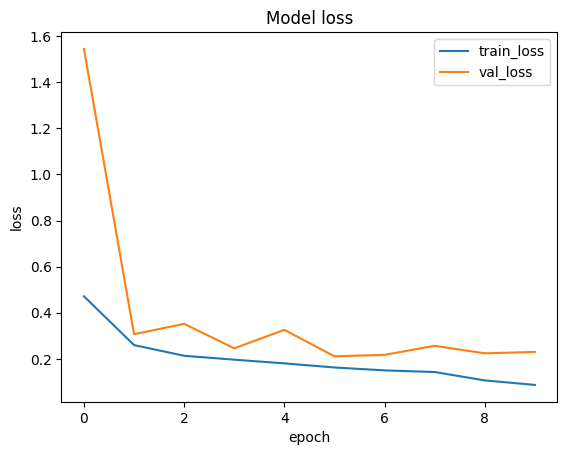

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.legend(['train_loss','val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


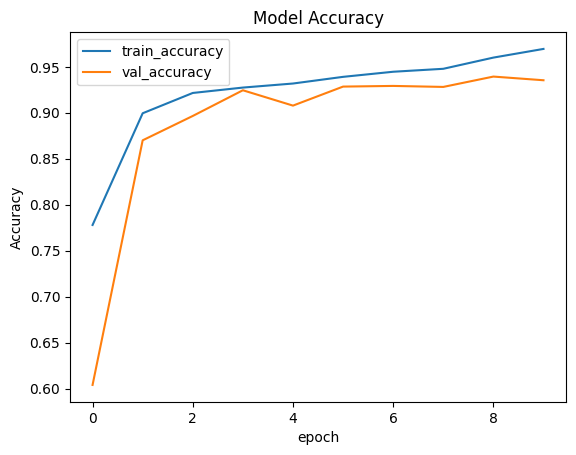

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['train_accuracy','val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()


**IMAGES THAT HAVE PORES SEEM TO BE PARSITIZED AND THAT ARE CLEAR SEEM TO BE UNINFECTED**

10. TESTING ON IMAGES FROM THE INTERNET

In [ ]:
# Load and preprocess an image
def preprocess_image(img_path, target_size=(IMG_SIZE,IMG_SIZE)):  # Ensure the target size matches your input layer
    img = image.load_img(img_path, target_size=target_size, color_mode='rgb')  # or 'grayscale' if needed
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0, 1] range if done during training
    return img_array

# Example of usage
img_path = '/content/parasitized.png'
preprocessed_img = preprocess_image(img_path)


In [ ]:
# Make a prediction
prediction = model.predict(preprocessed_img)

# Interpret the prediction
if prediction[0] > 0.5:  # Adjust the threshold as needed
    print("Predicted Class: Class 1")
else:
    print("Predicted Class: Class 0")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: Class 0


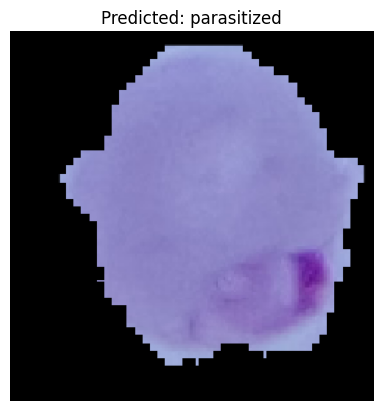

In [ ]:
# Display the image with the predicted label
img_display = image.load_img(img_path)
plt.imshow(img_display)

# Create the label text based on the prediction
predicted_label = dataset_info.features['label'].int2str(1) if prediction[0] > 0.5 else dataset_info.features['label'].int2str(0)

# Set the title
plt.title(f'Predicted: {predicted_label}')
plt.axis('off')
plt.show()



BELOW I HAVE SHOWN HOW TO LOAD A MODEL AND PREDICT

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model from a .h5 file or any saved model format
model = load_model('/content/malaria_model_2.h5')


In [ ]:
# Load and preprocess an image
def preprocess_image(img_path, target_size=(224,224)):  # Ensure the target size matches your input layer
    img = image.load_img(img_path, target_size=target_size, color_mode='rgb')  # or 'grayscale' if needed
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0, 1] range if done during training
    return img_array

# Example of usage
img_path = '/content/uninfected.jpeg'
preprocessed_img = preprocess_image(img_path)

In [ ]:
# Make a prediction
prediction = model.predict(preprocessed_img)

# Interpret the prediction
if prediction[0] > 0.5:  # Adjust the threshold as needed
    print("Predicted Class: Class 1")
else:
    print("Predicted Class: Class 0")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class: Class 0


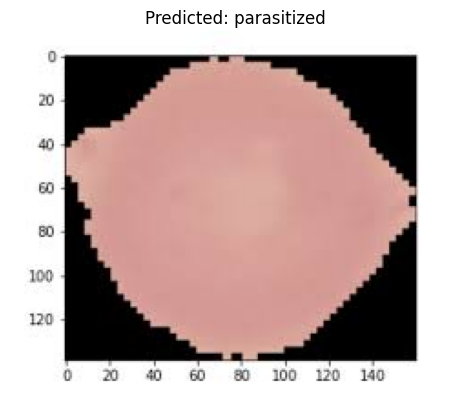

In [ ]:
# Display the image with the predicted label
img_display = image.load_img(img_path)
plt.imshow(img_display)

# Create the label text based on the prediction
predicted_label = dataset_info.features['label'].int2str(1) if prediction[0] > 0.5 else dataset_info.features['label'].int2str(0)

# Set the title
plt.title(f'Predicted: {predicted_label}')
plt.axis('off')
plt.show()

THE MODEL IS WORKING REALLY WELL , WITH AN ACCURACY OF MORE THAN 90 PERCENT


I HAVE NOTICED THAT SIMPLER MODELS SEEM TO WORK BETTER AT PREDICTING THAN THE COMPLEX MODELS